TODOS:
* a.	Check total number of entries and column types
1.     101
1.     11 COLUMN TYPES
* b.	Check any null (i.e. missing) values
* c.	Check duplicate entries
* d.	Plot distribution of numeric data (univariate and pairwise joint distribution)
* e.	Plot count distribution of categorical data
* f.	Analyze time series of numeric data by daily, monthly and yearly frequencies
* g.	Check with your mentor on additional steps to conduct (see below)

STEP 0: Imports and Reading in Data


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-conversational-data/intents.json
/kaggle/input/student-mental-health/Student Mental health.csv


In [2]:
data = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")

STEP 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes
* describes

In [3]:
data.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [4]:
data.tail(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


CHECKING FOR NULL
entry 434

In [5]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [6]:
data.duplicated().sum()


0

DATA CLEANING AND TRANSFORMATION
* renaming column labels for easy identification
* handling missing values

In [7]:
df = data.copy()

In [8]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Renaming of Colum Labels

In [9]:
df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

In [10]:
# Assuming your dataset is named 'df'
# Check for null or missing values in the dataset
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Timestamp         0
Gender            0
Age               1
Course            0
Year of Study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Treatment         0
dtype: int64


In [11]:
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [12]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [13]:
df['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [14]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [15]:
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [16]:
df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'KOE','Koe': 'KOE', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL': 'Benl', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law', 'Econs': 'Economics'} , inplace = True)

In [17]:
df['Course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology',
       'Communication ', 'Diploma Nursing', 'Pendidikan Islam ',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '], dtype=object)

In [18]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [19]:
df['CGPA'] = df['CGPA'].str.strip()

In [20]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Year of Study   101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic attack    101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


Missing Value in Age Column

In [22]:
median_age = df['Age'].median()
median_age 

19.0

In [23]:
df['Age'] = df['Age'].fillna(median_age)


Type casting to Int

In [24]:
df['Age'] = df['Age'].astype(int)

In [25]:
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18,Engineering,year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19,Nursing,year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


Check for Null

In [26]:
# Assuming your dataset is named 'df'
# Check for null or missing values in the dataset
null_entries = df[df.isnull().any(axis=1)]

# Display the entries with null values
print("Entries with null values:")
print(null_entries)

Entries with null values:
Empty DataFrame
Columns: [Timestamp, Gender, Age, Course, Year of Study, CGPA, Marital status, Depression, Anxiety, Panic attack, Treatment]
Index: []


Check for Duplicates

In [27]:
# Check for duplicate entries in the dataset
duplicate_entries = df[df.duplicated()]

# Display the duplicate entries
print("Duplicate entries:")
print(duplicate_entries)

Duplicate entries:
Empty DataFrame
Columns: [Timestamp, Gender, Age, Course, Year of Study, CGPA, Marital status, Depression, Anxiety, Panic attack, Treatment]
Index: []


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       101 non-null    object
 1   Gender          101 non-null    object
 2   Age             101 non-null    int64 
 3   Course          101 non-null    object
 4   Year of Study   101 non-null    object
 5   CGPA            101 non-null    object
 6   Marital status  101 non-null    object
 7   Depression      101 non-null    object
 8   Anxiety         101 non-null    object
 9   Panic attack    101 non-null    object
 10  Treatment       101 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.8+ KB


In [29]:
df.isna().sum()

Timestamp         0
Gender            0
Age               0
Course            0
Year of Study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Treatment         0
dtype: int64

In [30]:
df.describe()


,Age
count,101.000000
mean,20.514851
std,2.488429
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


Plot: Univariate Distribution of Age


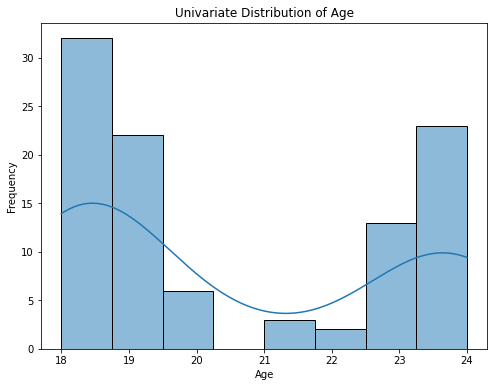

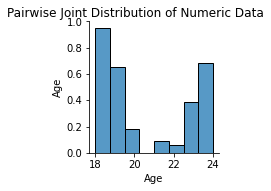

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_univariate_distribution(data):
    for column in data.select_dtypes(include='number').columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Univariate Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Pairwise joint distribution plots
def plot_pairwise_joint_distribution(data):
    sns.pairplot(data.select_dtypes(include='number'))
    plt.suptitle('Pairwise Joint Distribution of Numeric Data', y=1.02)
    plt.show()

# Assuming your dataset is named 'df'
# Plot univariate distribution of numeric data
plot_univariate_distribution(df)

# Plot pairwise joint distribution of numeric data
plot_pairwise_joint_distribution(df)

Plot Count Distribution for Categorical Data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


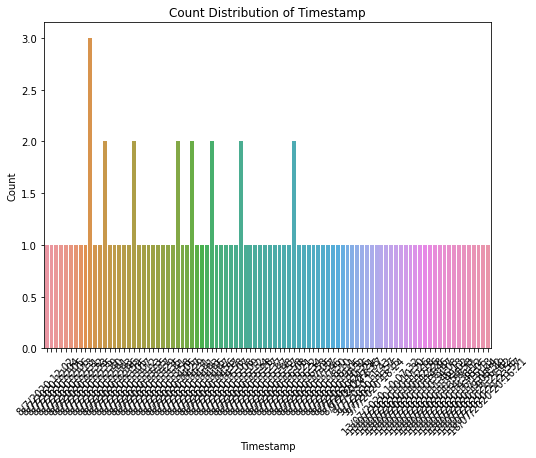

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


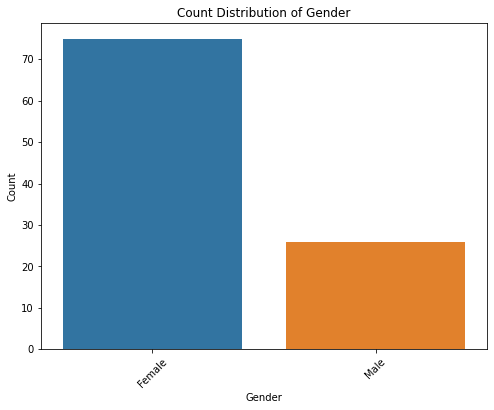

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


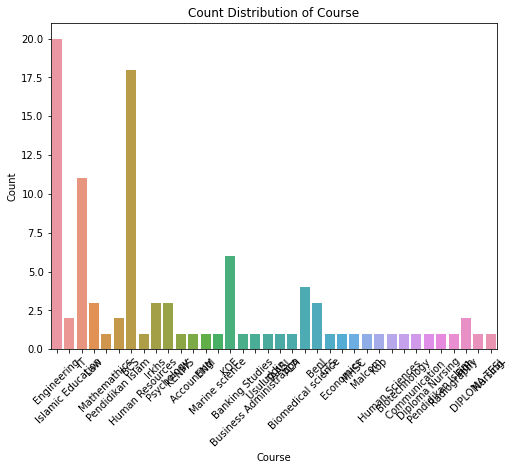

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


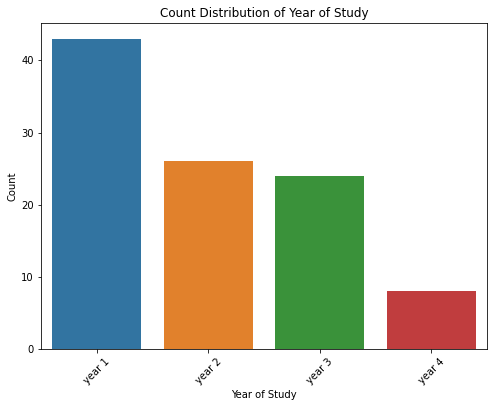

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


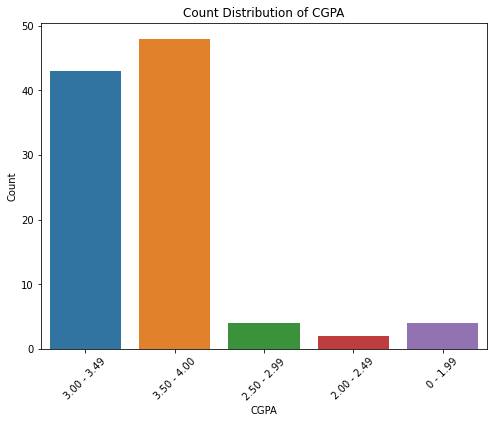

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


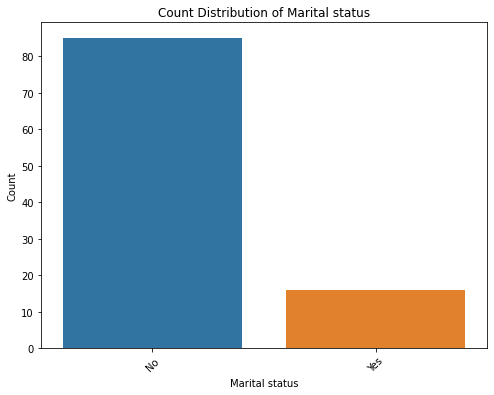

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


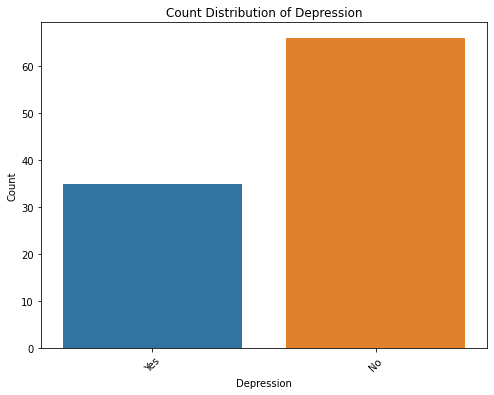

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


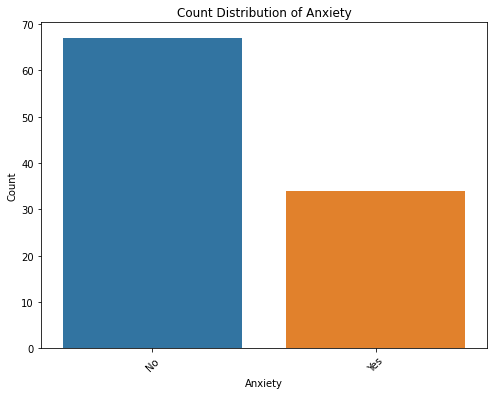

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


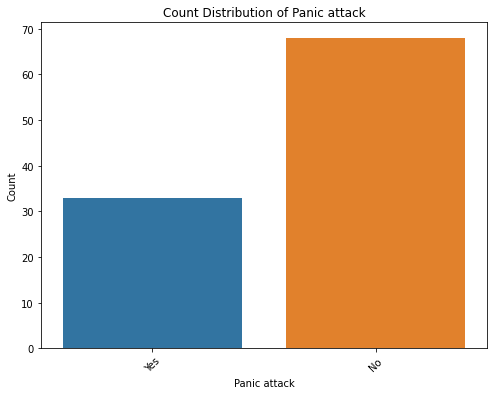

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


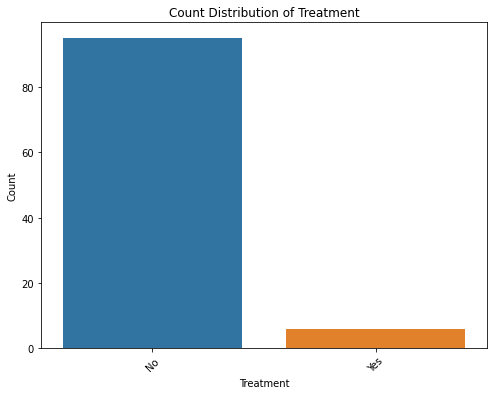

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count distribution of categorical data
def plot_count_distribution(data):
    for column in data.select_dtypes(include='object').columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data[column])
        plt.title(f'Count Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data
plot_count_distribution(df)

MAKE GRAPHS WIDER

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


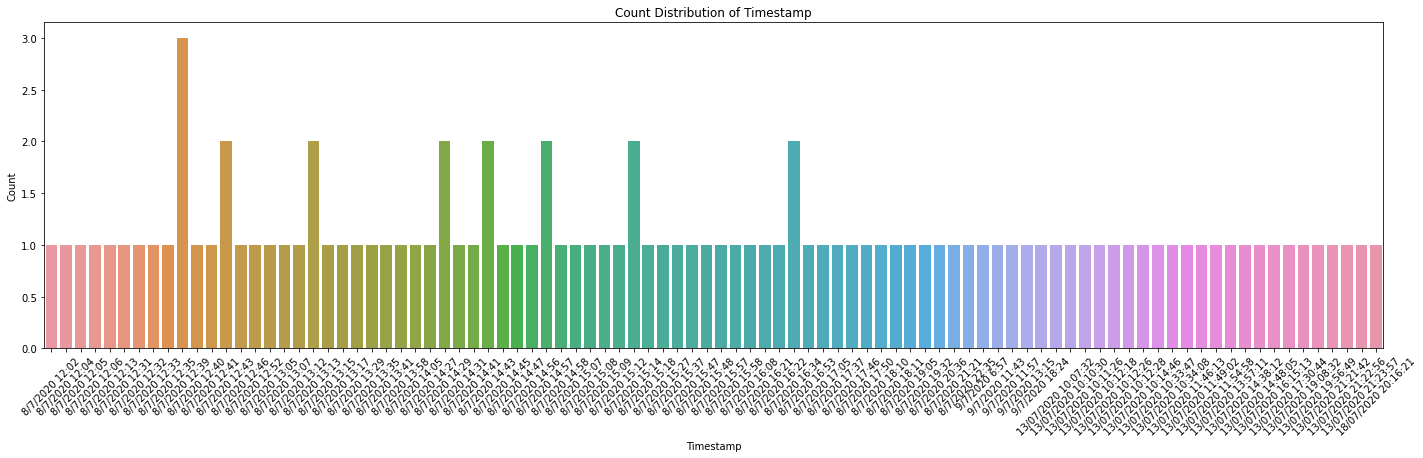

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


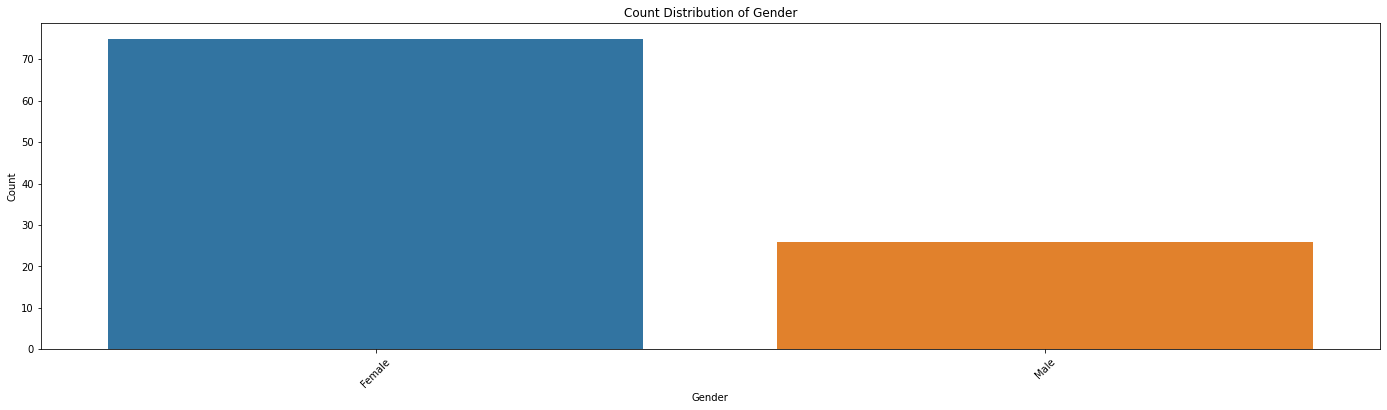

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


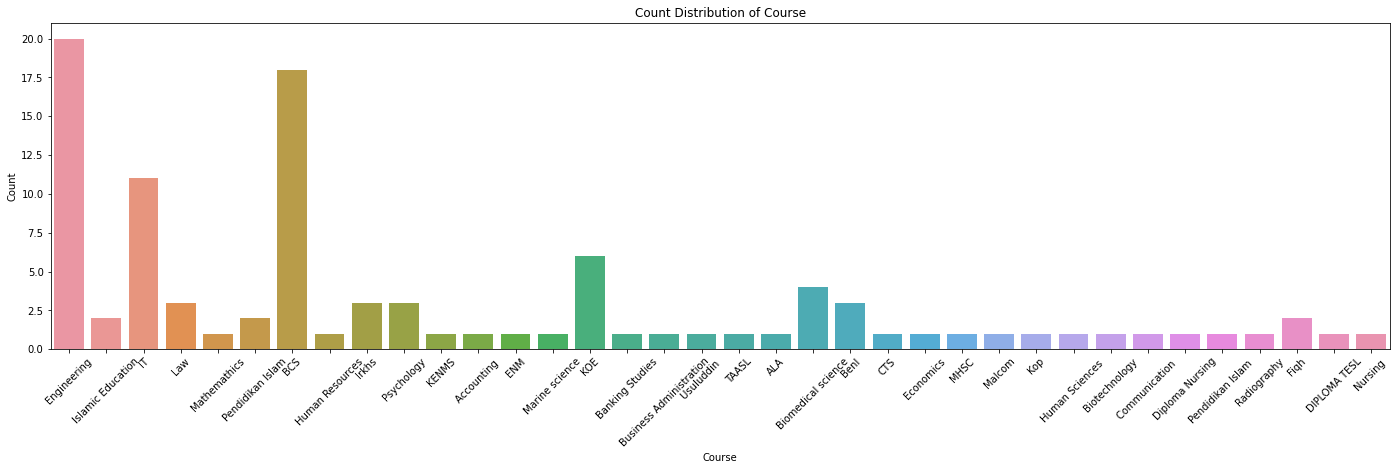

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


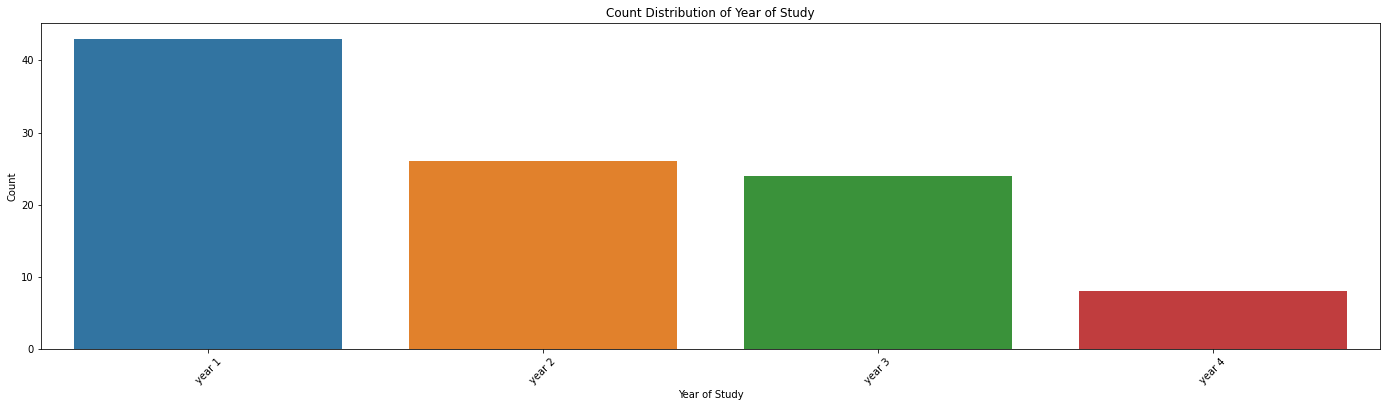

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


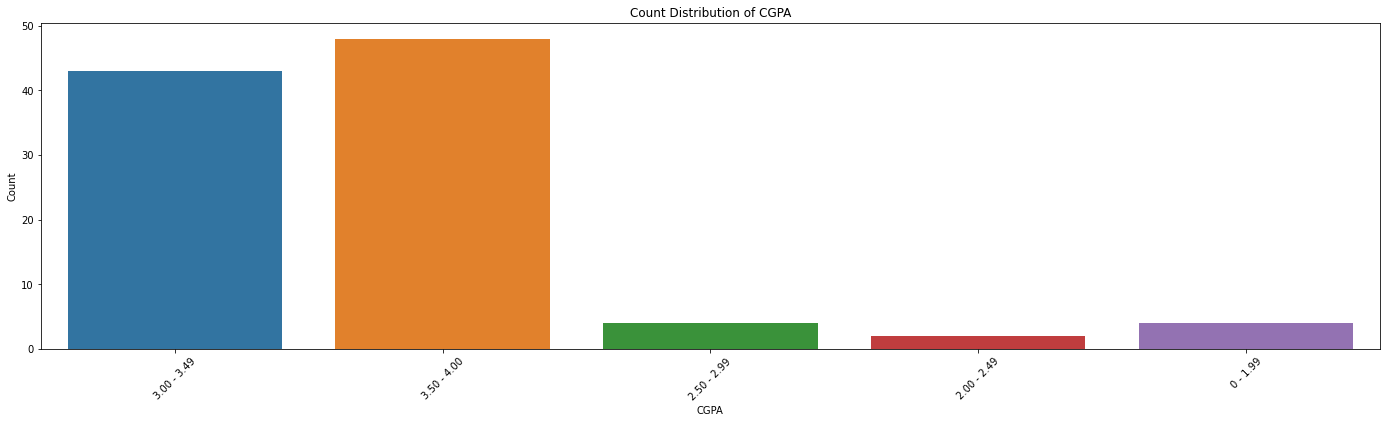

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


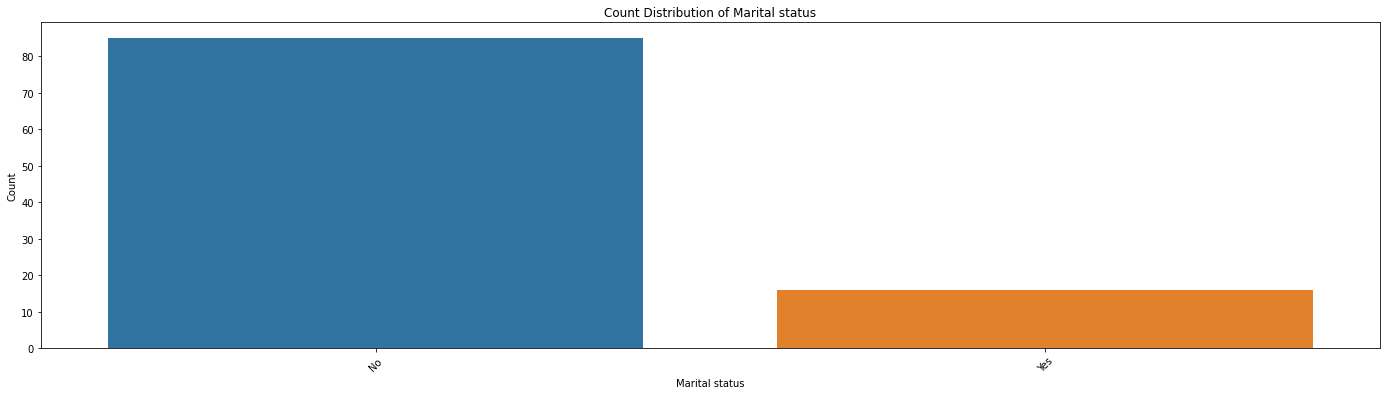

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


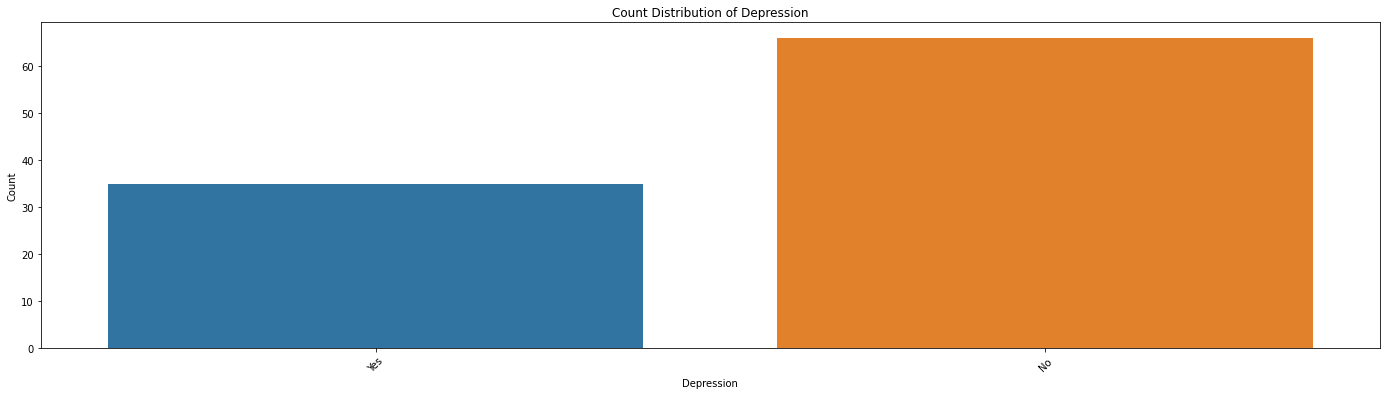

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


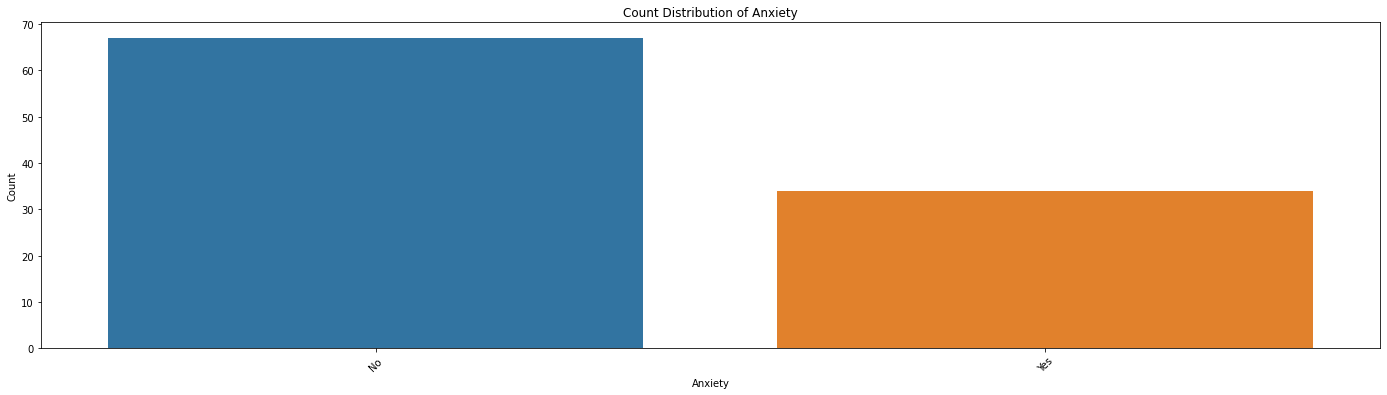

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


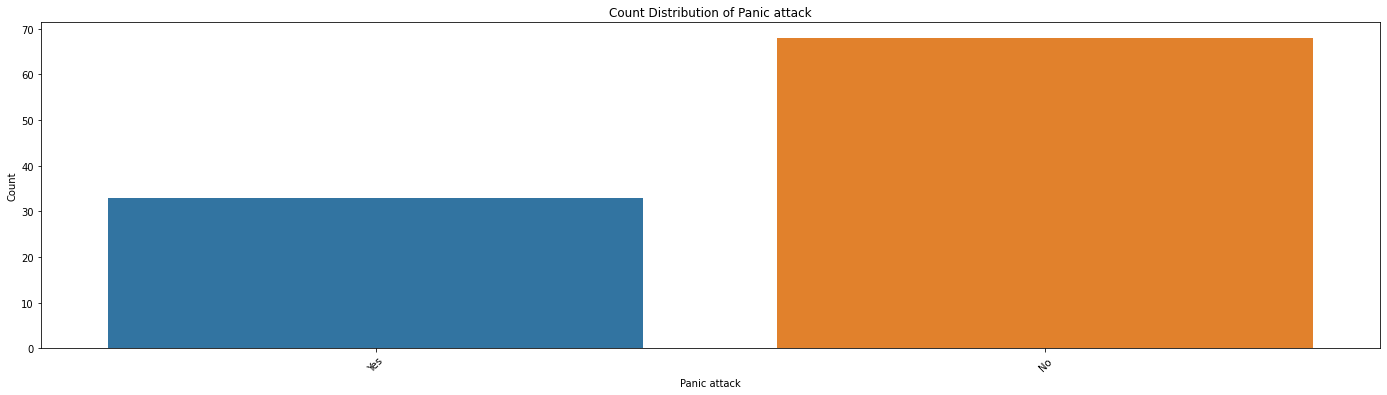

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


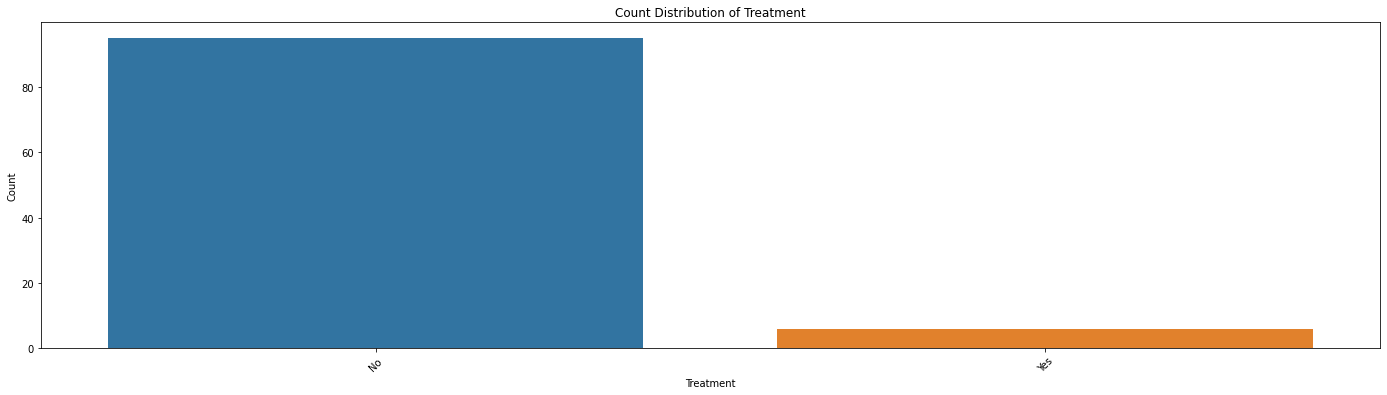

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count distribution of categorical data
def plot_count_distribution(data):
    for column in data.select_dtypes(include='object').columns:
        plt.figure(figsize=(24, 6))  # Increase width of the figure
        sns.countplot(data[column])
        plt.title(f'Count Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data
plot_count_distribution(df)